# Diferenciación e integración

Derivar mediante los siguientes caminos:
* Derivada por Polinomio interporlante de menor variabilidad (minimos cuadrados)
* Derivada por diferencias de dos puntos
* Derivada por diferencias de tres puntos

## Funciones Python

### Esta funciones pueden depender de las siguientes librerias

In [1]:
import numpy as np
import pandas as pd
import sympy
import matplotlib.pyplot as plt
%matplotlib inline


### Metodo de poliniomios interpolante por minimos cuadrados

In [2]:
def min_cuadrados(x,y,m):
    #*--- Entradas ---*#
    ## x, y son el par de datos con el que trabajaremos
    ## m, es el grado de polinomio que deseamos modelar
    
    m = int(m)
    
    if(len(x) != len(y)):
        return print("Error al ingresar datos!")    

    if(m >= len(x)):
        return print("Se requieren más datos para este grado")

    m += 1
    n = len(x)
    Sx = np.zeros((n,n),float)
    Sxy = np.zeros(n,float)
    auxSx = np.empty((m,m),float)
    auxSxy = np.empty((m),float)
    auxSol = np.empty((m),float)

    Px = 0
    X, Y = sympy.symbols('x y')
    
    #*--- Procesos ---*#
    # *--- Creando vectores ---*#
    for i in range(n):
        for j in range(n):
            for k in range(n):
                #*--- Matriz de sumatorias de x elevado ---*#
                Sx[i,j] += x[k]**(j+i)
            #*--- Vector de sumatorias de y * x elevado ---#
            Sxy[i] += y[j]*(x[j]**i) 
    
    #*--- Solucionando el sistema ---*#
    auxSx = Sx[0:m,0:m]
    auxSxy = Sxy[0:m]
    sol = np.linalg.solve(auxSx,auxSxy)
    auxSol = np.around(sol,3)
    #*--- Armando el polinomio solicitado ---*#
    for i in range(m):
        Px += X**i * np.around(sol[i],3)
    
    return Px

### Obtener el poliniomio que mejor se ajusta a la data (menor varianza)

In [3]:
def sigmaFunction(x,y):    
    sigma = sympy.Symbol('sigma')
    N = len(x)
    n = 2
    acum = 0
    grade = []
    y_b = []

    less_num = 0

    for i in range(N):
        function_c = (min_cuadrados(x,y,N-1))

        for j in range(N):
            acum += ((y[j]- function_c.subs('x',x[j]))**2)/(N-n-1)
        grade.append(acum)

    less_num = grade[0]
    for i in range(N):
        if(less_num > grade[i]):
            less_num = grade[i]

    grade_pol = grade.index(less_num)+1

    interpol = min_cuadrados(x,y,grade_pol)

    for i in range(N):
        y_b.append(interpol.subs('x',x[i]))

    print("El polinio que mejor interpola es de grado ", grade_pol)
    print("La varianza expresada es de ", sigma, '=', less_num)
    print("Y tiene la forma de: ", interpol)
    
    return interpol

### Obtener derivada del poliniomio interpolante

In [4]:
def pol_int_drv(x,fx):
    Px = sigmaFunction(x,fx)
    return sympy.diff(Px)

### Derivada por diferencias (usando dos puntos, hacia adelante)

In [5]:
def drv_ad(x,h):
    vec = []
    for i in range(0,len(x)):
        if i <= (len(x)-2):
        #si no estamos en el ultimo numero hacemos una derivada hacia adelante
            vec.append((x[i+1] - x[i])*(1/h))
        else :
        #llegados al ultimo punto hacemos una derivada hacia atras
            vec.append((x[i]-x[i-1])*(1/h))
    return vec

### Derivada por diferencias (usando dos puntos, centrada)

In [6]:
def drv_c(x,h):
    vec = []
    for i in range(0,len(x)):
        if i == 0:
            #si estamos en el primer número hacemos una derivada hacia adelante
            vec.append((x[i+1] - x[i])*(1/h))
        elif i == len(x)-1 :
        #llegados al ultimo punto hacemos una derivada hacia atras
            vec.append((x[i]-x[i-1])*(1/h))
        else:
            vec.append((-x[i-1]+x[i+1])*(1/(2*h)))
    return vec

### Derivada por diferencias (usando tres puntos, hacia delante)

In [7]:
def drv_ad3(x,h):
    vec = []
    for i in range(0,len(x)):
        if i <= len(x)-3:
            #si no estamos en el ultimo numero hacemos una derivada hacia adelante
            vec.append((-3 * x[i] + 4 * x[i+1] - 1 * x[i+2])*(1/(2*h)))
        elif i <= len(x)-2:
            #si estamos en el penultimo numero hacemos una derivada centrada
            vec.append((-1*x[i-1] + x[i+1])*(1/(2*h)))
        elif i <= len(x) - 1:
            #si no podemos escoger dos numeros adelante hacemos derivada hacia atras
            vec.append((x[i-2] - 4 * x[i-1] + 3 * x[i])*(1/(2*h)))
    return vec

### Segunda derivada derivada por diferencias (tres puntos)

In [8]:
def drv2_ad(x,h):
    vec = []
    for i in range(0,len(x)):
        if  len(x)-3 >= i:
            vec.append((x[i] - 2 * x[i+1] + x[i+2])/(h*h))
        elif i == len(x) - 2:     
            vec.append((x[i-1] - 2*x[i] + x[i+1])/(h*h))
        elif i == len(x) - 1:
            vec.append((x[i] - 2 * x[i-1] + x[i-2])/(h*h))
    
    return vec

Segunda derivada derivada por diferencias (tres puntos)

<hr>
<hr>
<hr>
<br>
<br>
<br>

## Supongase el siguiente ejercicio.

1. Un automóvil recorre una pista en 65 segundos. La distancia recorrida por el automóvil se determina cada 5 segundos. Los datos se presentan en la siguiente tabla.

In [9]:
time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65]

In [10]:
distance = [0, 54, 115, 175, 250, 330, 400, 460, 516, 566, 628, 698, 774, 844]

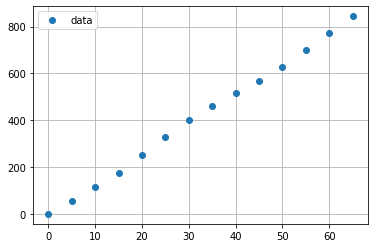

In [11]:
plt.plot(time,distance,'o',label='data')
plt.legend()
plt.grid(True)

**A partir de estos datos, calcule la velocidad y la aceleración usando derivadas**

Sabiendo que la primera derivada de la distancia es la velocidad
Sabiendo que la segunda derivada de la distancia es la aceleración

### Calculo de la velocidad (primera derivada)

**Calcule derivada por polinomio interpolante (minimos cuadrados)**

In [12]:
Fx = sigmaFunction(time,distance)
Fx

El polinio que mejor interpola es de grado  1
La varianza expresada es de  sigma = 5563258753454.58
Y tiene la forma de:  12.971*x - 6.543


12.971*x - 6.543

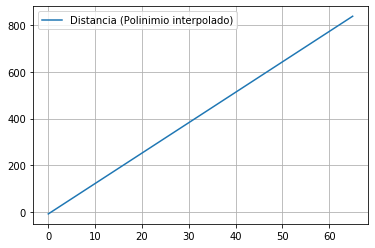

In [13]:
plt.plot(time,[Fx.subs('x',i) for i in time ], label="Distancia (Polinimio interpolado)")
plt.legend()
plt.grid(True)

In [14]:
Fx_drv = pol_int_drv(time,distance)
Fx_drv

El polinio que mejor interpola es de grado  1
La varianza expresada es de  sigma = 5563258753454.58
Y tiene la forma de:  12.971*x - 6.543


12.9710000000000

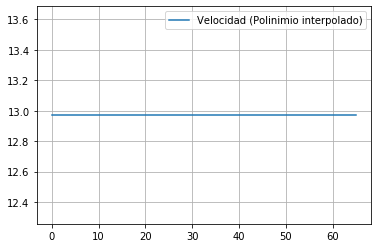

In [15]:
plt.plot(time,[Fx_drv.subs('x',i) for i in time ], label="Velocidad (Polinimio interpolado)")
plt.legend()
plt.grid(True)

Segun lo que podemos observar la derivada por polinomio interpolante siempre sera un numero constante para todos los casos

**Calcule derivada por diferencia de dos puntos hacia adelante**

In [16]:
speed = drv_ad(distance,5)
pd.Series(data=speed, index=['0', '5', '10', '15', '20', '25', '30', '35', '40', '45', '50', '55', '60', '65'], name="f\'(x)" )

0     10.8
5     12.2
10    12.0
15    15.0
20    16.0
25    14.0
30    12.0
35    11.2
40    10.0
45    12.4
50    14.0
55    15.2
60    14.0
65    14.0
Name: f'(x), dtype: float64

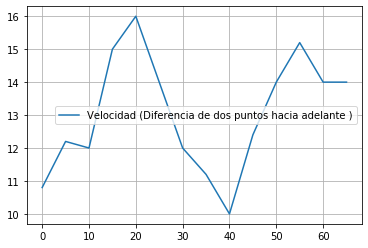

In [17]:
plt.plot(time,speed, label="Velocidad (Diferencia de dos puntos hacia adelante )")
plt.legend()
plt.grid(True)

**Resultados con la derivada por diferencia de dos puntos centrada**

In [18]:
speed = drv_c(distance,5)
pd.Series(data=speed, index=['0', '5', '10', '15', '20', '25', '30', '35', '40', '45', '50', '55', '60', '65'], name="f\'(x)" )

0     10.8
5     11.5
10    12.1
15    13.5
20    15.5
25    15.0
30    13.0
35    11.6
40    10.6
45    11.2
50    13.2
55    14.6
60    14.6
65    14.0
Name: f'(x), dtype: float64

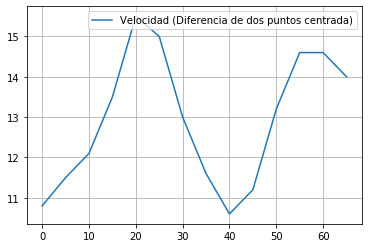

In [19]:
plt.plot(time,speed, label="Velocidad (Diferencia de dos puntos centrada)")
plt.legend()
plt.grid(True)

**Resultandos con la derivada por diferencia de tres puntos hacia adelante**

In [20]:
speed = drv_ad3(distance,5)
pd.Series(data=speed, index=['0', '5', '10', '15', '20', '25', '30', '35', '40', '45', '50', '55', '60', '65'], name="f\'(x)" )

0     10.1
5     12.3
10    10.5
15    14.5
20    17.0
25    15.0
30    12.4
35    11.8
40     8.8
45    11.6
50    13.4
55    15.8
60    14.6
65    13.4
Name: f'(x), dtype: float64

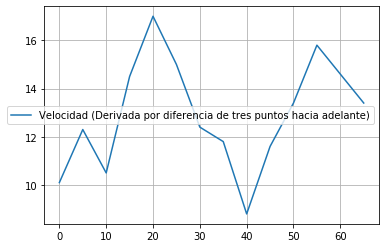

In [21]:
plt.plot(time,speed, label="Velocidad (Derivada por diferencia de tres puntos hacia adelante)")
plt.legend()
plt.grid(True)

Como podemos ver los valores son cercanos, considerando que h = 5 es un paso bastante grade dentro de los datos tomados

### Calculado la acelaración (segunda derivada)

Por diferencia de dos puntos podemos usar la misma funcion para derivar los datos obtenidos

In [22]:
acceleration = drv_ad(speed,5)
pd.Series(data=acceleration, index=['0', '5', '10', '15', '20', '25', '30', '35', '40', '45', '50', '55', '60', '65'], name="f\'\'(x)" )

0     0.44
5    -0.36
10    0.80
15    0.50
20   -0.40
25   -0.52
30   -0.12
35   -0.60
40    0.56
45    0.36
50    0.48
55   -0.24
60   -0.24
65   -0.24
Name: f''(x), dtype: float64

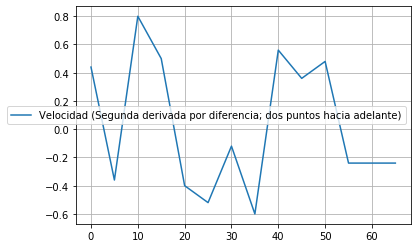

In [23]:
plt.plot(time,acceleration, label="Velocidad (Segunda derivada por diferencia; dos puntos hacia adelante)")
plt.legend()
plt.grid(True)

Calculemos la aceleracion por otro metodo, ahora directamente usando 
**Segunda derivada por diferencia de tres puntos, hacia adelante**

In [24]:
acceleration = drv2_ad(distance,5)
pd.Series(data=acceleration, index=['0', '5', '10', '15', '20', '25', '30', '35', '40', '45', '50', '55', '60', '65'], name="f\'\'(x)" )

0     0.28
5    -0.04
10    0.60
15    0.20
20   -0.40
25   -0.40
30   -0.16
35   -0.24
40    0.48
45    0.32
50    0.24
55   -0.24
60   -0.24
65   -0.24
Name: f''(x), dtype: float64

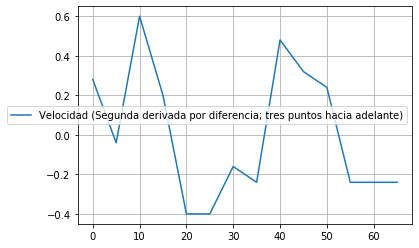

In [25]:
plt.plot(time,acceleration, label="Velocidad (Segunda derivada por diferencia; tres puntos hacia adelante)")
plt.legend()
plt.grid(True)

# Integración

Integrar mediante los siguientes caminos:

* Integral por Polinomio interporlante de menor variabilidad (minimos cuadrados)
* Integral por regla del trapecio simple
* Integral por regla del trapecio compuesto
* Integral por regla de Simpson simple
* Integral por regla de Simpson compuesta
* Integral por metodos de coeficientes indererminados

### Obtener integral por el metodo de polinomio interpolante

In [26]:
def fx(x):
    return 3;

def intg_int(x,y):
    Px = sigmaFunction(x,y)
    Px_intg = sympy.integrate(Px)
    return Px_intg

### Evaluar una lista de datos en una funcion

In [27]:
def eval_pol(Px,data):
    vec = []
    for i in range(len(data)):
        vec.append(sympy.simplify(Px).subs('x',data[i]))
    return vec    

### Integrar por el metodo del trapecio simple

Para una data dada

In [28]:
def intg_trap_s(a, b, yA, yB):
    # a limite inferior de la integral
    # b limite superior de la integral
    h = (int(b) - int(a))/2
    area = (yA+yB) * h
    return area

intg_trap_s(0,3,3,3)

9.0

In [29]:
def intg_trap_s_f(f, a, b):
    # a limite inferior de la integral
    # b limite superior de la integral
    h = (int(b) - int(a))/2
    area = (f(a)+f(b)) * h
    return area

### Integrar por el metodo del trapecio compuesto

Para datos discretos

In [30]:
def int_d_trap(data,h):
    area = data[0]+data[len(data)-1]
    
    for i in range (1,len(data)-1):
        area += 2 * y[i]
    
    h = h/2
    return h*area

y = [1.8,2.6,3.0,2.8,1.9]
int_d_trap(y,0.1)

1.0250000000000001

Para una funcion dada

In [31]:
def intg_f_trap(fx,a,b,n):
    # fx funcion a evaluar
    # a limite inferior de la integral
    # b limite superior de la integral
    h = 1.0*(b-a)/n;
    sum = 0.0;
    for i in range(n):
        sum += (fx(a+h*i) + fx(a+h*(i+1)))*h/2;
    return sum

### Integral por el metodo de Simpson Simple

Para una función continua

In [32]:
def simpson_s(fx, a,b):
    h = (b - a)/6
    area=h*(fx(a)+4*fx((a+b)/2)+fx(b))
    return area

### Integral por el método de Simpson compuesto
Para un data

In [33]:
def simpson_d_c(data):
    h = (data[len(data)-1] - data[0])/3
    area = 0
    sum = 0
    for i in range(1, len(data)-1):
        if i%2 == 0:
            area = 2 * data[i]
        else:
            area = 4 * data[i]
        sum += area
    sum += data[0] + data[len(data)-1]
        
    return h*sum

Para una función

In [34]:
def simpson_f_c(f,a,b,n):
    h = ( b - a )/n
    inter=0
    x = a
    area = 0
    for i in range(1, n):
        inter+= 2 * (i%2+1) * f(x+i*h)
        
    area += h/3*(f(a)+inter+f(b))
    return area

### Integral por el metodo de la cuadratura gaussiana

In [35]:
def cuadra_gausiana(f,a,b):
    funcion = sympy.simplify(f)  #convierte la funcion de string a expresion literal
    t1 = -((b-a)/float(2))*(1/float(np.sqrt(3))) + ((b+a)/float(2))
    t2 = ((b-a)/float(2))* (1/float(np.sqrt(3))) + ((b+a)/float(2))
    #evalua t1 en la funcion
    t1_evaluado = funcion.evalf(subs = {"x" : t1})
    print(t1_evaluado)
    #evalua t2 en la funcion
    t2_evaluado = funcion.evalf(subs = {"x" : t2})
    print(t2_evaluado)
    resul = ((b-a) /float(2))*(t1_evaluado + t2_evaluado)
    return resul

def f2(x):
    return np.cos(x)

#cuadra_gausiana(f2,0,3)


<hr>
<hr>
<hr>
<br>
<br>
<br>

## Supongase el siguiente ejercicio.

Teniendo en cuenta el ejercicio anterior integrar la velocidad y obtener la distancia

In [36]:
pd.Series(data=speed, index=['0', '5', '10', '15', '20', '25', '30', '35', '40', '45', '50', '55', '60', '65'], name="f\'(x)" )

0     10.1
5     12.3
10    10.5
15    14.5
20    17.0
25    15.0
30    12.4
35    11.8
40     8.8
45    11.6
50    13.4
55    15.8
60    14.6
65    13.4
Name: f'(x), dtype: float64

### Calculando la distancia Integrando por polinomio interpolado

In [37]:
pol_intg = intg_int(time,speed)
pol_intg

El polinio que mejor interpola es de grado  1
La varianza expresada es de  sigma = 1119779366233.96
Y tiene la forma de:  0.027*x + 12.057


0.0135*x**2 + 12.057*x

In [38]:
new_distance = eval_pol(pol_intg,time)
pd.Series(data=new_distance, index=['0', '5', '10', '15', '20', '25', '30', '35', '40', '45', '50', '55', '60', '65'], name="f\(x)" )

0                    0
5     60.6225000000000
10    121.920000000000
15    183.892500000000
20    246.540000000000
25    309.862500000000
30    373.860000000000
35    438.532500000000
40    503.880000000000
45    569.902500000000
50    636.600000000000
55    703.972500000000
60    772.020000000000
65    840.742500000000
Name: f\(x), dtype: object

Como podemos observar existe un cierto error asociado pero se observa una correspondencia entre los valores obtenidos y los valores esperados

### Ejercicio
Dado los siguietes puntos de una funcion $f(x): {(0.1,0.8),(0.2,2.6),(0.3,3.0),(0.4,2.8),(0.5,1.9)} $ \
Calcular la integral resultante

In [39]:
x = [0.1,0.2,0.3,0.4,0.5]
y = [0.8,2.6,3.0,2.8,1.9]

pol_intg = intg_int(x,y)
pol_intg

f = sigmaFunction(x,y)
f

El polinio que mejor interpola es de grado  1
La varianza expresada es de  sigma = 2.08175000015584e-8
Y tiene la forma de:  2.4*x + 1.5
El polinio que mejor interpola es de grado  1
La varianza expresada es de  sigma = 2.08175000015584e-8
Y tiene la forma de:  2.4*x + 1.5


2.4*x + 1.5

In [40]:
eval_pol(f,x)

[1.74000000000000,
 1.98000000000000,
 2.22000000000000,
 2.46000000000000,
 2.70000000000000]

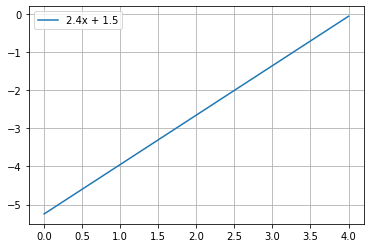

In [41]:
plt.plot([Fx.subs('x',i) for i in x ], label="2.4x + 1.5")
plt.legend()
plt.grid(True)

In [42]:
f_int = intg_int(x,y)
f_int

El polinio que mejor interpola es de grado  1
La varianza expresada es de  sigma = 2.08175000015584e-8
Y tiene la forma de:  2.4*x + 1.5


1.2*x**2 + 1.5*x

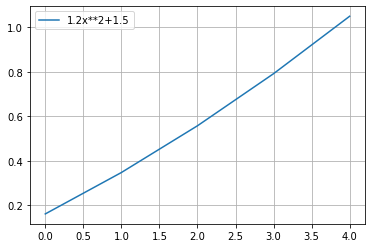

In [43]:
plt.plot([f_int.subs('x',i) for i in x ], label="1.2x**2+1.5")
plt.legend()
plt.grid(True)

### Ejercicio

La siguiente función no es integrable analíticamente. $$f(x) = \sqrt {x} \sin x; 0\leq x \leq 2$$
Use la formula de los trapecios para obtener una respuesta aproximada de la integral.

In [44]:
f = lambda x: np.sqrt(x)*np.sin(x)

intg_f_trap(f,0,2,4)


1.5225616399674986

In [45]:
vec = []
x = []
for i in range(1,20,2):
    vec.append(intg_f_trap(f,0,2,i))
    x.append(i)
vec

[1.2859407532478362,
 1.513442949703151,
 1.5265009313522835,
 1.5297156801629415,
 1.5309526749001752,
 1.5315501121142354,
 1.5318817227849462,
 1.5320839760180025,
 1.5322160362539332,
 1.5323068349285849]

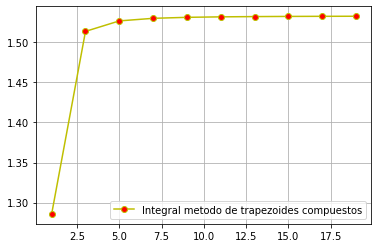

In [46]:
plt.plot(x,vec,c='y', marker='o' ,  mfc='red', label="Integral metodo de trapezoides compuestos")
plt.legend()
plt.grid(True)

### Ejercicio

Si $g$ es una función diferenciable en $[a,b]$, la longitud del arco de la curva $g$ en ese intervalo se puede calcular con la intergral $ S = \displaystyle\int_{a}^{b} \sqrt { 1 + g^{'}(x)^2}\ dx  $, Calcular la longitud de arco de $g(x) = \sin{x}, x \in [0,2] $ usando dos parabolas $(m = 4)$

### Solucionando

Longitud de arco  $ = \displaystyle\int_{a}^{b} \sqrt { 1 + g^{'}(x)^2}\ dx = \displaystyle\int_{0}^{2} \sqrt { 1 + \cos{x}^2}\ dx$

Es decir: $f(x) = \sqrt { 1 + [\cos{x}]^2}$ 

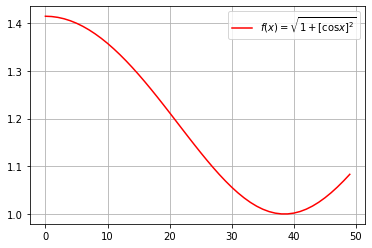

In [47]:
f = lambda x: np.sqrt(1 + (np.cos(x)**2))
x = np.linspace(0,2)

plt.plot(f(x),c="r", label="$f(x) = \sqrt { 1 + [\cos{x}]^2}$")
plt.legend()
plt.grid(True)

In [48]:
simpson_s(f, 0,2)

2.347954999837473

In [52]:
simpson_f_c(f,0,2,4)

2.3504136916156644

In [57]:
vec = []
x = []
for i in range(1,20):
    vec.append(simpson_f_c(f,0,2,i))
    x.append(i)
vec

[1.6648980448891177,
 2.347954999837473,
 2.142080989740074,
 2.3504136916156644,
 2.2171220307819732,
 2.3515361384227584,
 2.253396208166459,
 2.351646207253357,
 2.274371302811514,
 2.351671546706058,
 2.2879866397302493,
 2.3516805638227076,
 2.297530525734928,
 2.351684389015975,
 2.304589668756869,
 2.3516862293406477,
 2.31002190269385,
 2.3516872030064935,
 2.3143312206592905]

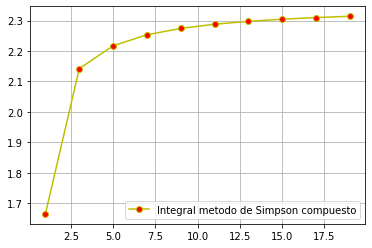

In [54]:
plt.plot(x,vec,c='y', marker='o' ,  mfc='red', label="Integral metodo de Simpson compuesto")
plt.legend()
plt.grid(True)